In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
log = pd.read_csv('dec_2018_log.csv', parse_dates=True, index_col='datetime' )
log.head()

,source_ip,username,success,failure_reason
datetime,,,,
2018-12-01 04:49:47.142477,230.51.96.84,wkim,True,NaN
2018-12-01 05:04:23.263704,51.241.77.10,ibrown,True,NaN
2018-12-01 05:09:22.549408,51.241.77.10,ibrown,True,NaN
2018-12-01 06:09:26.126252,87.106.250.46,ssmith,False,error_wrong_password
2018-12-01 06:09:27.126252,87.106.250.46,ssmith,False,error_wrong_password


In [4]:
log.shape

(9024, 4)

In [15]:
log_agg = log.assign(
    failure = lambda x: np.invert(x.success)
).groupby('source_ip').agg(
{
    'username': 'nunique',
    'success': 'sum',
    'failure':'sum'
}
).assign(
attempts = lambda x: x.success + x.failure,
success_rate = lambda x: x.success / x.attempts,
failure_rate = lambda x: x.failure / x.attempts
).reset_index()

In [18]:
log_agg.head()

,source_ip,username,success,failure,attempts,success_rate,failure_rate
0,1.138.149.116,1,21.0,0.0,21.0,1.000000,0.000000
1,100.43.18.36,1,15.0,0.0,15.0,1.000000,0.000000
2,101.113.31.197,1,9.0,0.0,9.0,1.000000,0.000000
3,101.154.143.93,1,28.0,1.0,29.0,0.965517,0.034483
4,102.133.183.240,1,6.0,0.0,6.0,1.000000,0.000000


In [23]:
attacks = pd.read_csv('dec_2018_attacks.csv')

In [24]:
attacks.head()

,start,end,source_ip
0,2018-12-01 06:09:25.126252,2018-12-01 06:13:32.126252,87.106.250.46
1,2018-12-02 17:08:51.659516,2018-12-02 17:13:06.659516,124.100.154.251
2,2018-12-02 22:31:34.932660,2018-12-02 22:35:47.932660,162.193.160.52
3,2018-12-03 03:41:24.236627,2018-12-03 03:41:58.236627,3.187.98.222
4,2018-12-04 04:51:10.436412,2018-12-04 04:55:18.436412,12.203.107.201


In [28]:
is_attack = log_agg.source_ip.isin(attacks.source_ip)

In [26]:
is_attack

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19      True
20     False
21     False
22      True
23      True
24     False
25     False
26     False
27      True
28      True
29      True
       ...  
264    False
265    False
266    False
267     True
268    False
269    False
270    False
271    False
272    False
273    False
274     True
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288     True
289    False
290    False
291    False
292     True
293    False
Name: source_ip, Length: 294, dtype: bool

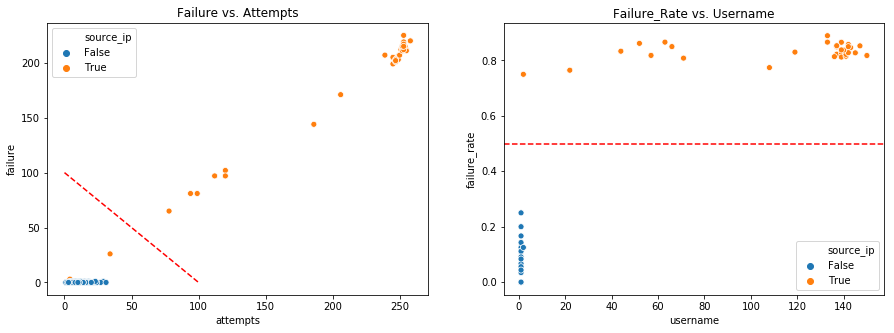

In [35]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

for ax, (y, x) in zip(axes, (('failure', 'attempts'), ('failure_rate', 'username'))):
    
    ax= sns.scatterplot(
        x= log_agg[x],
        y= log_agg[y],
        ax = ax,
        hue= is_attack
    )
    ax.set_title(f"{y.title()} vs. {x.title()}")
    
axes[0].plot([0,100], [100,0], 'r--')
axes[1].axhline(0.5, color= 'red', linestyle='--')

In [44]:
hourly_ip_logs = log.assign(
    failures = lambda x: np.invert(x.success)
).groupby('source_ip').resample('1H').agg({
    'username': 'nunique',
    'success': 'sum',
    'failures': 'sum'
}).assign(
    attempts = lambda x: x.success + x.failures,
    success_rate = lambda x: x.success / x.attempts,
    failure_rate = lambda x: x.failures / x.attempts
).dropna().reset_index()

hourly_ip_logs.head(10)

,source_ip,datetime,username,success,failures,attempts,success_rate,failure_rate
0,1.138.149.116,2018-12-11 05:00:00,1,4.0,0.0,4.0,1.0,0.0
1,1.138.149.116,2018-12-11 06:00:00,1,1.0,0.0,1.0,1.0,0.0
2,1.138.149.116,2018-12-19 23:00:00,1,1.0,0.0,1.0,1.0,0.0
3,1.138.149.116,2018-12-24 16:00:00,1,3.0,0.0,3.0,1.0,0.0
4,1.138.149.116,2018-12-25 04:00:00,1,3.0,0.0,3.0,1.0,0.0
5,1.138.149.116,2018-12-25 05:00:00,1,3.0,0.0,3.0,1.0,0.0
6,1.138.149.116,2018-12-25 06:00:00,1,1.0,0.0,1.0,1.0,0.0
7,1.138.149.116,2018-12-25 07:00:00,1,2.0,0.0,2.0,1.0,0.0
8,1.138.149.116,2018-12-28 02:00:00,1,3.0,0.0,3.0,1.0,0.0
9,100.43.18.36,2018-12-01 16:00:00,1,1.0,0.0,1.0,1.0,0.0


In [45]:
def get_baselines(hourly_ip_logs, func, *args, **kwargs):
    """
    Calculate hourly bootstrapped statistic per column.
    
    Parameters:
        - hourly_ip_logs: Data to sample from.
        - func: Statistic to calculate.
        - args: Additional positional arguments for `func`
        - kwargs: Additional keyword arguments for `func`
    
    Returns:
        A pandas DataFrame of hourly bootstrapped statistics
    """
    if isinstance(func, str):
        func = getattr(pd.DataFrame, func)
    return hourly_ip_logs.assign(
        hour=lambda x: x.datetime.dt.hour
    ).groupby('hour').apply(
        lambda x: x.sample(10, random_state=0, replace=True).pipe(func, *args, **kwargs)
    )

In [46]:
medians = get_baselines(hourly_ip_logs, 'median')

In [49]:
medians

,username,success,failures,attempts,success_rate,failure_rate,hour
hour,,,,,,,
0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,1.0,1.0,0.0,1.0,1.0,0.0,2.0
3,1.0,1.0,0.0,1.0,1.0,0.0,3.0
4,1.0,1.0,0.0,1.0,1.0,0.0,4.0
5,1.0,1.0,0.0,1.0,1.0,0.0,5.0
6,1.0,1.0,0.0,1.0,1.0,0.0,6.0
7,1.0,1.0,0.0,1.0,1.0,0.0,7.0
8,1.0,1.0,0.0,1.0,1.0,0.0,8.0


In [67]:
flaged_ip = hourly_ip_logs.assign(
    hour = lambda x: x.datetime.dt.hour
).join(
    medians, on='hour', rsuffix = '_median'
).assign(
    flaged_median = lambda x:
    np.logical_or(
    np.logical_and(
        x.failures_median *5 <= x.failures,
        x.attempts_median *5 <= x.attempts),
        x.username_median *5 <= x.username
    )
).query('flaged_median').source_ip.drop_duplicates()

flaged_ip

27       101.154.143.93
91      113.162.208.193
99        115.94.212.74
100      119.224.29.115
108      12.203.107.201
109     121.147.201.245
110      121.90.233.205
111      122.197.157.59
124     124.100.154.251
139      13.183.250.233
142       130.0.243.199
252      149.63.170.104
270        151.19.160.7
275       153.60.249.72
322      162.193.160.52
479      184.99.196.253
484         185.2.99.58
488       189.129.85.67
513     196.229.137.227
600     209.190.162.180
621      211.41.206.218
640      216.47.145.212
651     220.140.156.223
689     232.159.100.161
725      25.215.139.208
748        3.187.98.222
764       31.166.161.10
829       42.36.247.249
851        48.85.35.228
852        49.76.49.155
927       62.38.152.194
933       63.245.107.31
1000       70.75.40.168
1035       78.6.154.160
1042        8.46.128.35
1061     81.169.193.182
1088      87.106.250.46
1155       96.187.45.99
1170       97.32.235.17
Name: source_ip, dtype: object

In [68]:
def evaluate(alerted_ips, attack_ips, log_ips):
    """
    Calculate true positives (TP), false positives (FP), 
    true negatives (TN), and false negatives (FN) for 
    IP addresses flagged as suspicious.
    
    Parameters:
        - alerted_ips: Pandas series of flagged IP addresses
        - attack_ips: Pandas series of attacker IP addresses
        - log_ips: Pandas series of all IP addresses seen
    
    Returns:
        Tuple of form (TP, FP, TN, FN)
    """
    tp = alerted_ips.isin(attack_ips).sum()
    tn = log_ips[log_ips.isin(alerted_ips)].isin(attack_ips).sum()
    fp = np.invert(
        log_ips[log_ips.isin(alerted_ips)].isin(attack_ips)).sum()
    fn = np.invert(
        log_ips[log_ips.isin(attack_ips)].isin(alerted_ips)).sum()
    return tp, fp, tn, fn

In [70]:
# make this easier to call
from functools import partial
scores = partial(
    evaluate, 
    attack_ips=pd.read_csv('dec_2018_attacks.csv').source_ip, 
    log_ips=log.source_ip.drop_duplicates()
)

In [71]:
def classification_stats(tp, fp, tn, fn):
    """Calculate accuracy, precision, recall, and F1-score"""
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1_score = 2 * precision * recall / (precision + recall)
    return {
        'accuracy' : (tp + tn) / (tp + fp + tn + fn),
        'precision' : precision,
        'recall' : recall,
        'F1-score' : f1_score
    }

In [72]:
classification_stats(*scores(flaged_ip))

{'accuracy': 0.918918918918919,
 'precision': 0.8717948717948718,
 'recall': 0.9714285714285714,
 'F1-score': 0.9189189189189189}